# Data Exploration

**Author**: Maleakhi Agung Wijaya  
**Email**: *maw219@cam.ac.uk*  
**Description**: This file contains code used for data loading, processing, and analysis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from os.path import join
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_absolute_error as mae
import os
from pathlib2 import Path
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, backend as K, callbacks

In [2]:
%run Utilities.ipynb

## Load data

In this step, we load all datasets that we have.

In [3]:
market_orders, n_markets, aggregated_datasets = load_aggregated_datasets([DATASET_DJI, 
                                                                          DATASET_NASDAQ, 
                                                                          DATASET_NYSE,
                                                                          DATASET_RUSSELL, 
                                                                          DATASET_SP])

# Load datasets
## DJI
dji_df = aggregated_datasets["DJI"]

## NASDAQ
nasdaq_df = aggregated_datasets["NASDAQ"]

## NYSE
nyse_df = aggregated_datasets["NYA"]

## Russell
russell_df = aggregated_datasets["RUT"]

## SP
sp_df = aggregated_datasets["S&P"]

In [4]:
## DJI
for col, n_null in zip(dji_df.columns, dji_df.isnull().sum()):
    print(f"{col}: {n_null}")

Close: 0
Volume: 0
mom: 0
mom1: 0
mom2: 0
mom3: 0
ROC_5: 0
ROC_10: 0
ROC_15: 0
ROC_20: 0
EMA_10: 0
EMA_20: 0
EMA_50: 0
EMA_200: 0
DTB4WK: 0
DTB3: 0
DTB6: 0
DGS5: 0
DGS10: 0
Oil: 0
Gold: 0
DAAA: 0
DBAA: 0
GBP: 422
JPY: 423
CAD: 427
CNY: 423
AAPL: 0
AMZN: 0
GE: 0
JNJ: 0
JPM: 0
MSFT: 0
WFC: 0
XOM: 0
FCHI: 37
FTSE: 63
GDAXI: 63
GSPC: 0
HSI: 153
IXIC: 0
SSEC: 212
RUT: 0
NYSE: 0
TE1: 0
TE2: 0
TE3: 0
TE5: 0
TE6: 0
DE1: 0
DE2: 0
DE4: 0
DE5: 0
DE6: 0
CTB3M: 0
CTB6M: 0
CTB1Y: 0
AUD: 0
Brent: 0
CAC-F: 4
copper-F: 0
WIT-oil: 0
DAX-F: 4
DJI-F: 0
EUR: 0
FTSE-F: 6
gold-F: 0
HSI-F: 67
KOSPI-F: 71
NASDAQ-F: 0
GAS-F: 0
Nikkei-F: 0
NZD: 0
silver-F: 0
RUSSELL-F: 0
S&P-F: 0
CHF: 0
Dollar index-F: 0
Dollar index: 0
wheat-F: 0
XAG: 0
XAU: 0
MOVEMENT: 0


In [6]:
dji_df.shape[0] - dji_df.dropna().shape[0]

669

In [5]:
## NASDAQ
for col, n_null in zip(nasdaq_df.columns, nasdaq_df.isnull().sum()):
    print(f"{col}: {n_null}")

Close: 0
Volume: 0
mom: 0
mom1: 0
mom2: 0
mom3: 0
ROC_5: 0
ROC_10: 0
ROC_15: 0
ROC_20: 0
EMA_10: 0
EMA_20: 0
EMA_50: 0
EMA_200: 0
DTB4WK: 0
DTB3: 0
DTB6: 0
DGS5: 0
DGS10: 0
Oil: 0
Gold: 0
DAAA: 0
DBAA: 0
GBP: 422
JPY: 423
CAD: 427
CNY: 423
AAPL: 0
AMZN: 0
GE: 0
JNJ: 0
JPM: 0
MSFT: 0
WFC: 0
XOM: 0
FCHI: 37
FTSE: 63
GDAXI: 63
GSPC: 0
HSI: 153
DJI: 0
SSEC: 212
RUT: 0
NYSE: 0
TE1: 0
TE2: 0
TE3: 0
TE5: 0
TE6: 0
DE1: 0
DE2: 0
DE4: 0
DE5: 0
DE6: 0
CTB3M: 0
CTB6M: 0
CTB1Y: 0
AUD: 0
Brent: 0
CAC-F: 4
copper-F: 0
WIT-oil: 0
DAX-F: 4
DJI-F: 0
EUR: 0
FTSE-F: 6
gold-F: 0
HSI-F: 67
KOSPI-F: 71
NASDAQ-F: 0
GAS-F: 0
Nikkei-F: 0
NZD: 0
silver-F: 0
RUSSELL-F: 0
S&P-F: 0
CHF: 0
Dollar index-F: 0
Dollar index: 0
wheat-F: 0
XAG: 0
XAU: 0
MOVEMENT: 0


In [7]:
nasdaq_df.shape[0] - nasdaq_df.dropna().shape[0]

669

In [20]:
## RUSSELL
for col, n_null in zip(russell_df.columns, russell_df.isnull().sum()):
    print(f"{col}: {n_null}")

Close: 0
Volume: 0
mom: 0
mom1: 0
mom2: 0
mom3: 0
ROC_5: 0
ROC_10: 0
ROC_15: 0
ROC_20: 0
EMA_10: 0
EMA_20: 0
EMA_50: 0
EMA_200: 0
DTB4WK: 0
DTB3: 0
DTB6: 0
DGS5: 0
DGS10: 0
Oil: 0
Gold: 0
DAAA: 0
DBAA: 0
GBP: 422
JPY: 423
CAD: 427
CNY: 423
AAPL: 0
AMZN: 0
GE: 0
JNJ: 0
JPM: 0
MSFT: 0
WFC: 0
XOM: 0
FCHI: 37
FTSE: 63
GDAXI: 63
DJI: 0
HSI: 153
IXIC: 0
SSEC: 212
S&P: 0
NYSE: 0
TE1: 0
TE2: 0
TE3: 0
TE5: 0
TE6: 0
DE1: 0
DE2: 0
DE4: 0
DE5: 0
DE6: 0
CTB3M: 0
CTB6M: 0
CTB1Y: 0
AUD: 0
Brent: 0
CAC-F: 4
copper-F: 0
WIT-oil: 0
DAX-F: 4
DJI-F: 0
EUR: 0
FTSE-F: 6
gold-F: 0
HSI-F: 67
KOSPI-F: 71
NASDAQ-F: 0
GAS-F: 0
Nikkei-F: 0
NZD: 0
silver-F: 0
RUSSELL-F: 0
S&P-F: 0
CHF: 0
Dollar index-F: 0
Dollar index: 0
wheat-F: 0
XAG: 0
XAU: 0
MOVEMENT: 0


In [8]:
russell_df.shape[0] - russell_df.dropna().shape[0]

669

In [21]:
## NYSE
for col, n_null in zip(nyse_df.columns, nyse_df.isnull().sum()):
    print(f"{col}: {n_null}")

Close: 0
Volume: 0
mom: 0
mom1: 0
mom2: 0
mom3: 0
ROC_5: 0
ROC_10: 0
ROC_15: 0
ROC_20: 0
EMA_10: 0
EMA_20: 0
EMA_50: 0
EMA_200: 0
DTB4WK: 0
DTB3: 0
DTB6: 0
DGS5: 0
DGS10: 0
Oil: 0
Gold: 0
DAAA: 0
DBAA: 0
GBP: 422
JPY: 423
CAD: 427
CNY: 423
AAPL: 0
AMZN: 0
GE: 0
JNJ: 0
JPM: 0
MSFT: 0
WFC: 0
XOM: 0
FCHI: 37
FTSE: 63
GDAXI: 63
DJI: 0
HSI: 153
IXIC: 0
SSEC: 212
S&P: 0
RUT: 0
TE1: 0
TE2: 0
TE3: 0
TE5: 0
TE6: 0
DE1: 0
DE2: 0
DE4: 0
DE5: 0
DE6: 0
CTB3M: 0
CTB6M: 0
CTB1Y: 0
AUD: 0
Brent: 0
CAC-F: 4
copper-F: 0
WIT-oil: 0
DAX-F: 4
DJI-F: 0
EUR: 0
FTSE-F: 6
gold-F: 0
HSI-F: 67
KOSPI-F: 71
NASDAQ-F: 0
GAS-F: 0
Nikkei-F: 0
NZD: 0
silver-F: 0
RUSSELL-F: 0
S&P-F: 0
CHF: 0
Dollar index-F: 0
Dollar index: 0
wheat-F: 0
XAG: 0
XAU: 0
MOVEMENT: 0


In [22]:
## S&P 500
for col, n_null in zip(sp_df.columns, sp_df.isnull().sum()):
    print(f"{col}: {n_null}")

Close: 0
Volume: 0
mom: 0
mom1: 0
mom2: 0
mom3: 0
ROC_5: 0
ROC_10: 0
ROC_15: 0
ROC_20: 0
EMA_10: 0
EMA_20: 0
EMA_50: 0
EMA_200: 0
DTB4WK: 0
DTB3: 0
DTB6: 0
DGS5: 0
DGS10: 0
Oil: 0
Gold: 0
DAAA: 0
DBAA: 0
GBP: 422
JPY: 423
CAD: 427
CNY: 423
AAPL: 0
AMZN: 0
GE: 0
JNJ: 0
JPM: 0
MSFT: 0
WFC: 0
XOM: 0
FCHI: 37
FTSE: 63
GDAXI: 63
DJI: 0
HSI: 153
IXIC: 0
SSEC: 212
RUT: 0
NYSE: 0
TE1: 0
TE2: 0
TE3: 0
TE5: 0
TE6: 0
DE1: 0
DE2: 0
DE4: 0
DE5: 0
DE6: 0
CTB3M: 0
CTB6M: 0
CTB1Y: 0
AUD: 0
Brent: 0
CAC-F: 4
copper-F: 0
WIT-oil: 0
DAX-F: 4
DJI-F: 0
EUR: 0
FTSE-F: 6
gold-F: 0
HSI-F: 67
KOSPI-F: 71
NASDAQ-F: 0
GAS-F: 0
Nikkei-F: 0
NZD: 0
silver-F: 0
RUSSELL-F: 0
S&P-F: 0
CHF: 0
Dollar index-F: 0
Dollar index: 0
wheat-F: 0
XAG: 0
XAU: 0
MOVEMENT: 0


In [9]:
sp_df.shape[0] - sp_df.dropna().shape[0]

669

In [4]:
# Fill missing values, do some scaling (run prev cell first)
list_df = []

for df in [dji_df, nasdaq_df, nyse_df, russell_df, sp_df]:
    columns = df.columns
    df.fillna(0, inplace=True) # fill na with 0
    y = df["MOVEMENT"].copy()
    X = df.drop(columns=["MOVEMENT"]).copy()
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X))
    X["MOVEMENT"] = np.array(y)
    X.columns = columns
    list_df.append(X)
    
### Clean dataframe (full features)
dji_df_full = list_df[0]
nasdaq_df_full = list_df[1]
nyse_df_full = list_df[2]
russell_df_full = list_df[3]
sp_df_full = list_df[4]

## Exploring the attributes

In this section, we examine the attributes, including correlation with class variable, class distribution, key variables distributions.

#### Correlation

In [70]:
## DJI
corr_dji = dji_df_full.drop(columns=["MOVEMENT"]).corr()
print(corr_dji["Close"].sort_values(ascending=False))

Close             1.000000
EMA_10            0.998567
EMA_20            0.997054
EMA_50            0.993439
EMA_200           0.981826
DTB6              0.733821
DTB3              0.706437
DTB4WK            0.698546
TE6               0.583541
DGS5              0.465887
TE5               0.465410
ROC_20            0.111304
ROC_15            0.098847
ROC_10            0.082570
ROC_5             0.058441
HSI               0.043049
HSI-F             0.041327
SSEC              0.037933
MSFT              0.035714
FCHI              0.029140
CAC-F             0.028041
AMZN              0.027563
KOSPI-F           0.027411
NASDAQ-F          0.026714
Nikkei-F          0.025970
IXIC              0.025657
mom               0.025631
mom2              0.025414
JPM               0.024783
mom1              0.024489
                    ...   
wheat-F           0.003556
CHF               0.002173
silver-F          0.001982
Gold             -0.000368
Brent            -0.000938
WIT-oil          -0.002076
g

In [71]:
print(corr_dji["EMA_10"].sort_values(ascending=False))

EMA_10            1.000000
EMA_20            0.999497
Close             0.998567
EMA_50            0.996608
EMA_200           0.985025
DTB6              0.732694
DTB3              0.704273
DTB4WK            0.696968
TE6               0.584143
DGS5              0.465619
TE5               0.461004
ROC_20            0.076544
ROC_15            0.059012
ROC_10            0.038404
SSEC              0.027947
HSI               0.026324
HSI-F             0.024468
GBP               0.017391
MSFT              0.016490
AMZN              0.013246
EUR               0.012409
ROC_5             0.012016
KOSPI-F           0.011311
CNY               0.010560
CTB6M             0.010282
CTB1Y             0.009678
Nikkei-F          0.009065
mom3              0.008811
copper-F          0.007950
FCHI              0.007721
                    ...   
XAU              -0.006357
DJI-F            -0.006689
Dollar index     -0.007505
Dollar index-F   -0.008413
S&P-F            -0.010684
NYSE             -0.010991
G

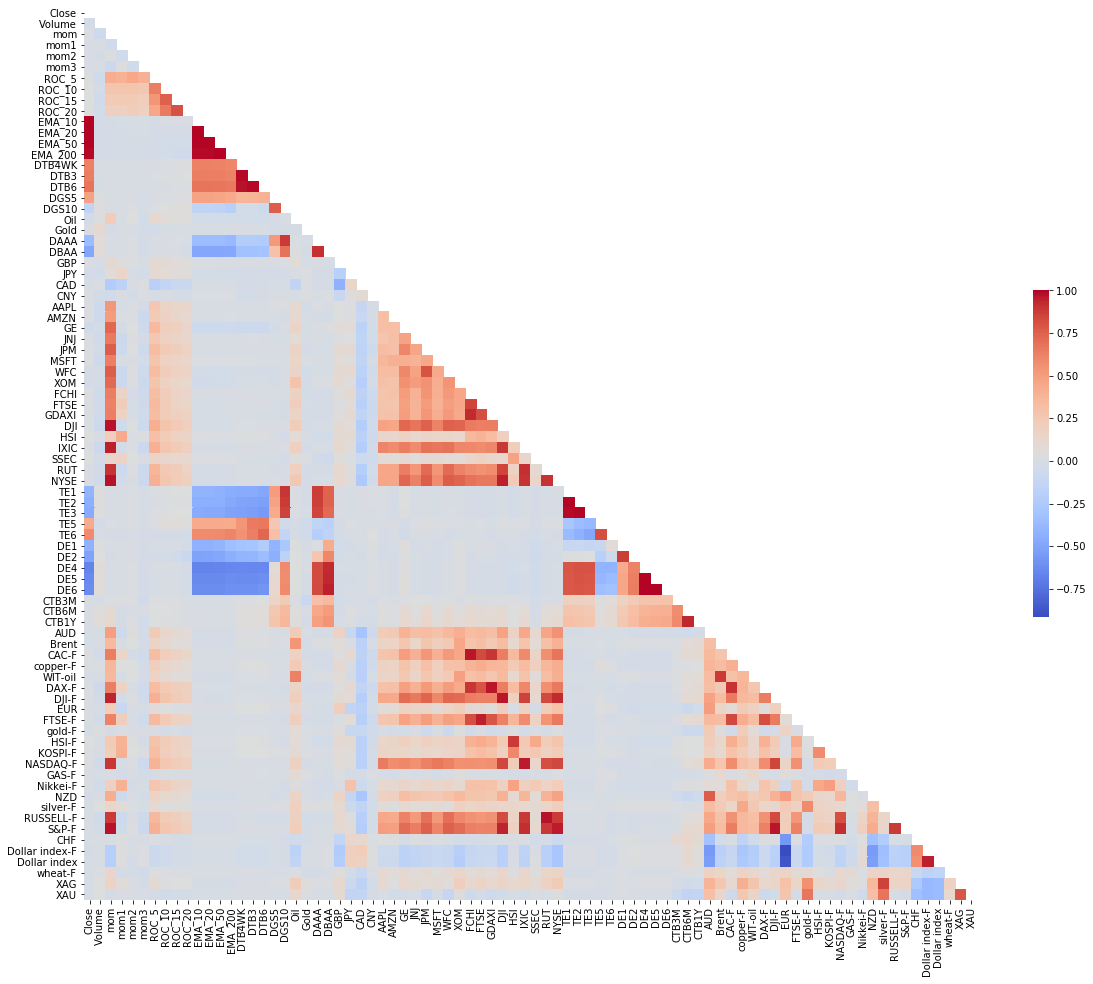

In [75]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_dji)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_dji,
            xticklabels=corr_dji.columns,
            yticklabels=corr_dji.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

In [60]:
## NASDAQ
corr_dji = nasdaq_df_full.drop(columns=["MOVEMENT"]).corr()
print(corr_dji["Close"].sort_values(ascending=False))

Close             1.000000
EMA_10            0.999020
EMA_20            0.998047
EMA_50            0.995808
EMA_200           0.987986
DTB6              0.736353
DTB3              0.697372
DTB4WK            0.686230
TE6               0.629247
DGS5              0.480500
TE5               0.477236
ROC_20            0.066693
ROC_15            0.061941
ROC_10            0.054690
ROC_5             0.040511
HSI               0.035262
HSI-F             0.033998
MSFT              0.032211
SSEC              0.031212
AMZN              0.027506
KOSPI-F           0.024498
FCHI              0.021161
NASDAQ-F          0.020617
CAC-F             0.019854
mom               0.018825
mom2              0.018376
mom1              0.017812
JPM               0.017583
copper-F          0.016663
GBP               0.016009
                    ...   
GAS-F             0.003390
Gold              0.002924
RUSSELL-F         0.002263
gold-F            0.001110
AUD               0.000782
Brent            -0.002747
C

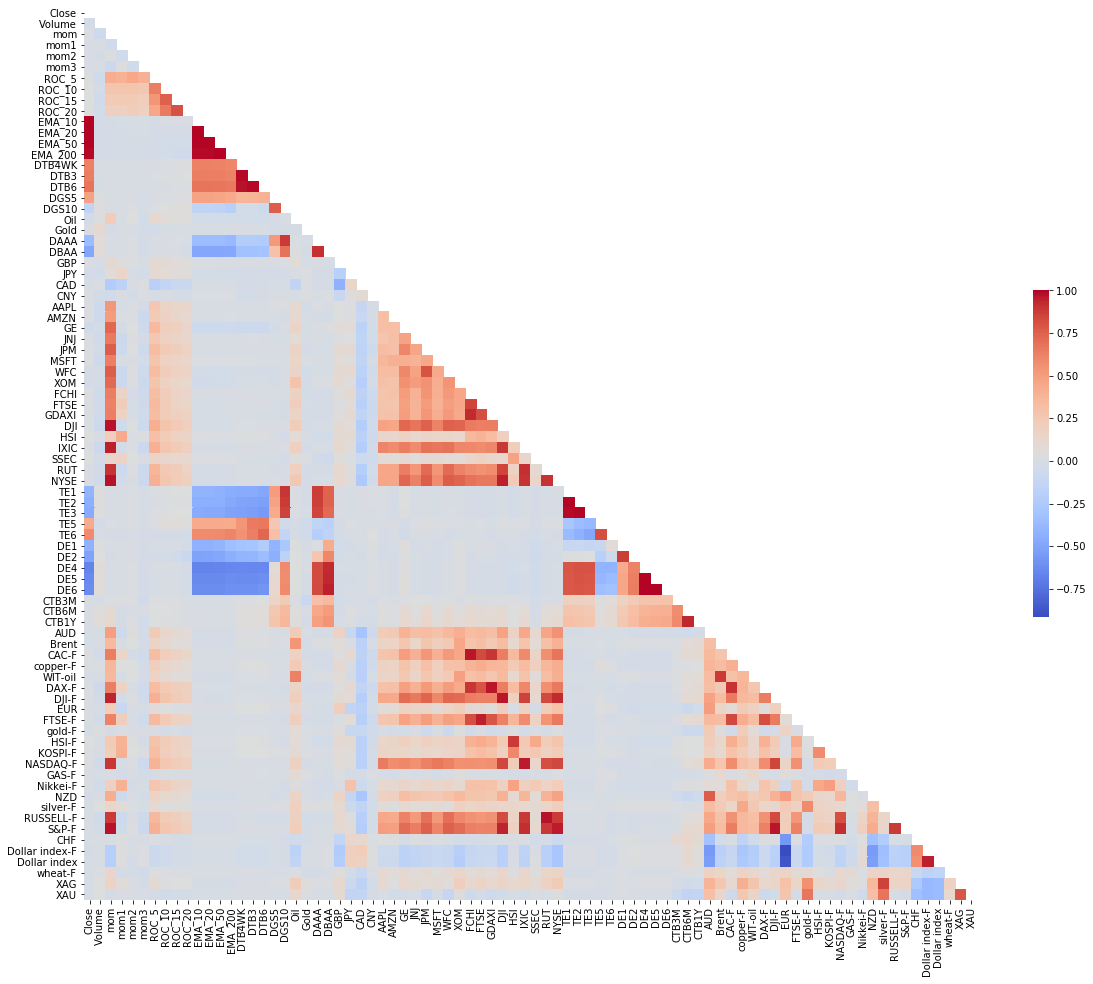

In [74]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_dji)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_dji,
            xticklabels=corr_dji.columns,
            yticklabels=corr_dji.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

In [62]:
## NYSE
corr_dji = nyse_df_full.drop(columns=["MOVEMENT"]).corr()
print(corr_dji["Close"].sort_values(ascending=False))

Close             1.000000
EMA_10            0.997126
EMA_20            0.994285
EMA_50            0.986977
EMA_200           0.958281
DTB6              0.572429
DTB3              0.549441
DTB4WK            0.545379
DGS5              0.542613
TE6               0.453816
TE5               0.350959
ROC_20            0.091160
ROC_15            0.083773
ROC_10            0.073374
ROC_5             0.055734
SSEC              0.051426
HSI               0.049228
HSI-F             0.046404
MSFT              0.040169
NASDAQ-F          0.035852
CAC-F             0.034657
IXIC              0.034538
Nikkei-F          0.033318
FCHI              0.033263
GBP               0.032902
AMZN              0.032701
JPM               0.031699
DAX-F             0.030489
DJI               0.030447
KOSPI-F           0.028051
                    ...   
Gold              0.001366
WFC              -0.000404
AUD              -0.000414
wheat-F          -0.000892
Brent            -0.001241
WIT-oil          -0.002006
X

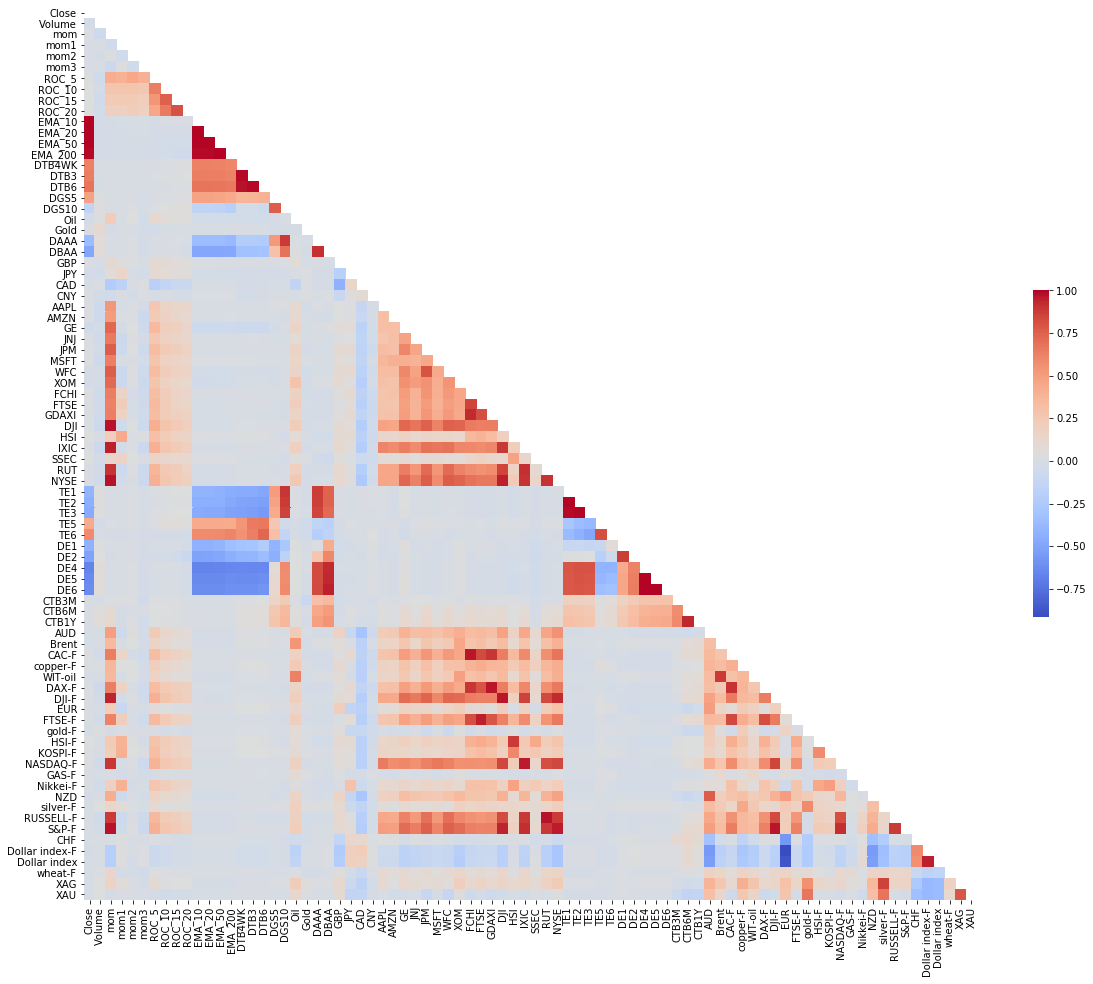

In [73]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_dji)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_dji,
            xticklabels=corr_dji.columns,
            yticklabels=corr_dji.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

In [64]:
## RUSSELL
corr_dji = russell_df_full.drop(columns=["MOVEMENT"]).corr()
print(corr_dji["Close"].sort_values(ascending=False))

Close             1.000000
EMA_10            0.997568
EMA_20            0.994999
EMA_50            0.988547
EMA_200           0.964507
DTB6              0.641516
DTB3              0.615268
DTB4WK            0.607049
DGS5              0.534439
TE6               0.520907
TE5               0.412495
ROC_20            0.073856
ROC_15            0.067583
ROC_10            0.056883
HSI               0.042745
ROC_5             0.041939
HSI-F             0.041254
MSFT              0.038770
SSEC              0.037421
AMZN              0.032775
NASDAQ-F          0.032434
IXIC              0.032359
CAC-F             0.031387
FCHI              0.031229
KOSPI-F           0.028799
GBP               0.028190
JPM               0.027923
Nikkei-F          0.027416
DAX-F             0.027068
DJI               0.026032
                    ...   
silver-F          0.001844
AUD               0.000949
Gold              0.000502
Brent             0.000076
WIT-oil          -0.000300
CHF              -0.001979
W

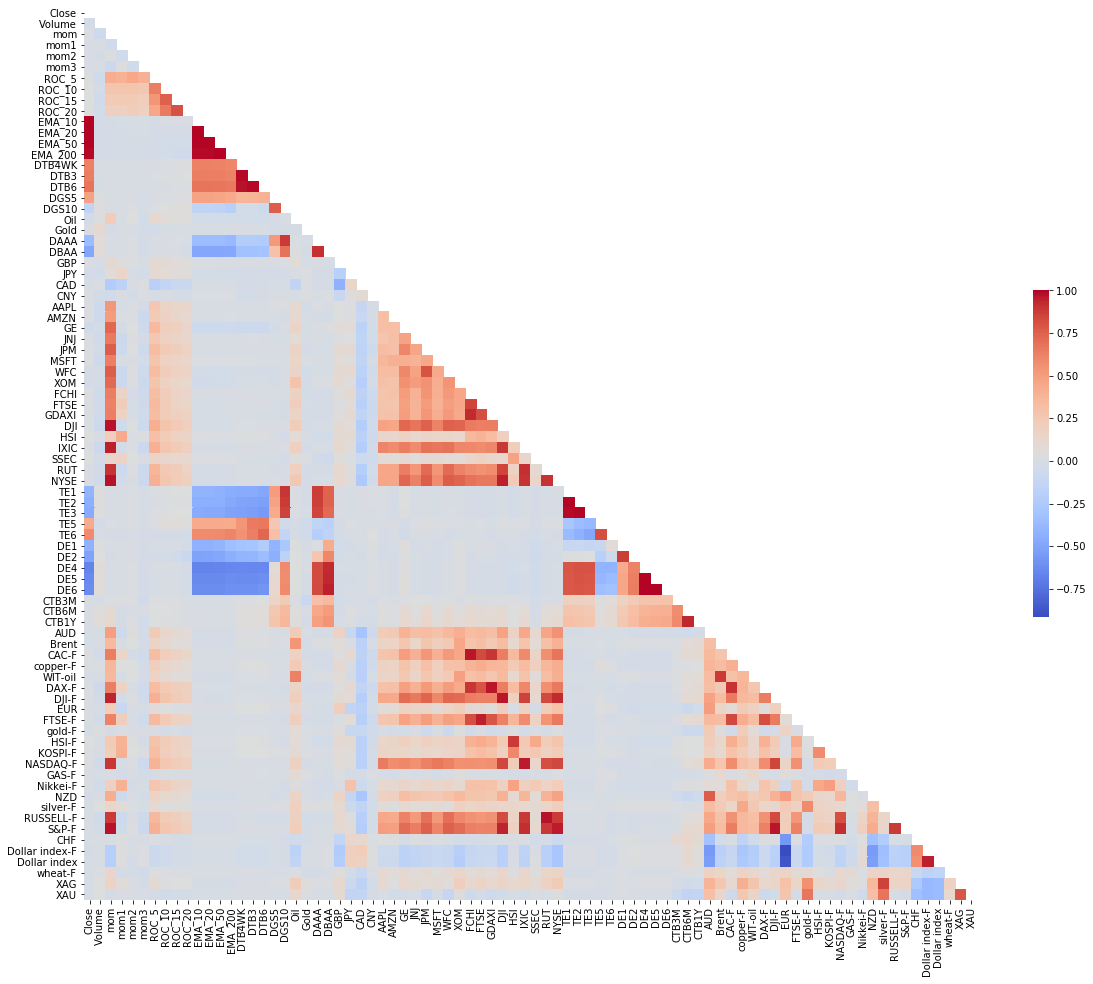

In [72]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_dji)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_dji,
            xticklabels=corr_dji.columns,
            yticklabels=corr_dji.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

In [66]:
## S&P 500
corr_dji = sp_df_full.drop(columns=["MOVEMENT"]).corr()
print(corr_dji["Close"].sort_values(ascending=False))

Close             1.000000
EMA_10            0.998865
EMA_20            0.997762
EMA_50            0.995229
EMA_200           0.986898
DTB6              0.681512
DTB3              0.643949
DTB4WK            0.633962
TE6               0.585828
DGS5              0.473013
TE5               0.439081
ROC_20            0.043708
ROC_15            0.041755
HSI               0.040085
ROC_10            0.038039
SSEC              0.037452
HSI-F             0.037357
MSFT              0.033231
ROC_5             0.029966
AMZN              0.027438
FCHI              0.026117
CAC-F             0.025096
KOSPI-F           0.024029
NASDAQ-F          0.023668
IXIC              0.022644
JPM               0.022561
DJI               0.020702
Nikkei-F          0.020648
GBP               0.020398
DAX-F             0.020216
                    ...   
wheat-F           0.002885
CHF               0.002802
Gold              0.001728
gold-F           -0.001325
AUD              -0.001856
Brent            -0.003487
W

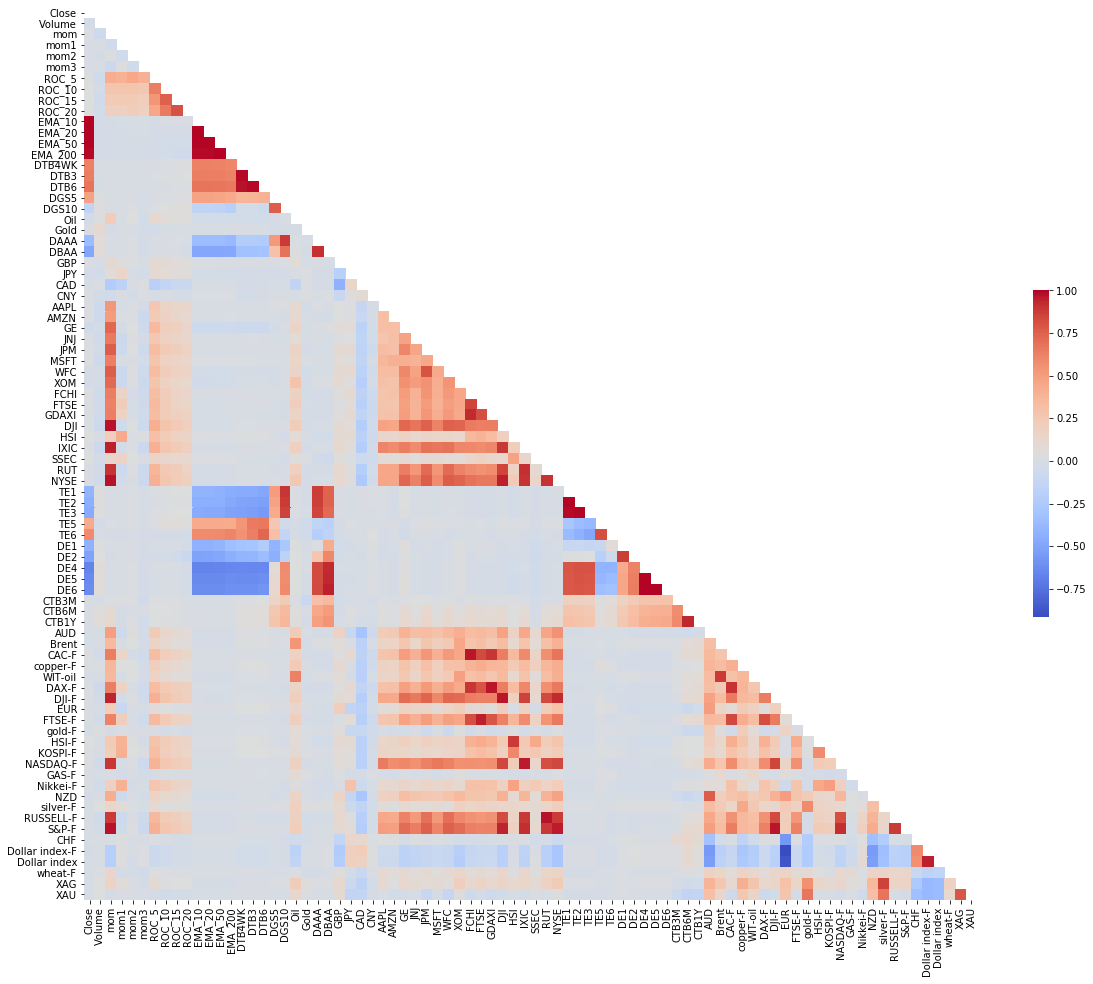

In [71]:
fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_dji)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_dji,
            xticklabels=corr_dji.columns,
            yticklabels=corr_dji.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.2},
           cmap="coolwarm")
plt.show()

#### Class Distribution

In [29]:
dji_df_full["MOVEMENT"].value_counts()

1    961
0    822
Name: MOVEMENT, dtype: int64

In [30]:
nasdaq_df_full["MOVEMENT"].value_counts()

1    998
0    785
Name: MOVEMENT, dtype: int64

In [31]:
nyse_df_full["MOVEMENT"].value_counts()

1    954
0    829
Name: MOVEMENT, dtype: int64

In [32]:
russell_df_full["MOVEMENT"].value_counts()

1    953
0    830
Name: MOVEMENT, dtype: int64

In [33]:
sp_df_full["MOVEMENT"].value_counts()

1    973
0    810
Name: MOVEMENT, dtype: int64

In [21]:
# Class distribution plot
dji_class = dji_df_full[["MOVEMENT"]]
dji_class["dataset_name"] = ["DJI" for i in range(dji_df_full.shape[0])]

nasdaq_class = nasdaq_df_full[["MOVEMENT"]]
nasdaq_class["dataset_name"] = ["NASDAQ" for i in range(dji_df_full.shape[0])]

nyse_class = nyse_df_full[["MOVEMENT"]]
nyse_class["dataset_name"] = ["NYSE" for i in range(dji_df_full.shape[0])]

russell_class = russell_df_full[["MOVEMENT"]]
russell_class["dataset_name"] = ["RUSSELL" for i in range(dji_df_full.shape[0])]

sp_class = sp_df_full[["MOVEMENT"]]
sp_class["dataset_name"] = ["S&P 500" for i in range(dji_df_full.shape[0])]

In [22]:
# Concatenate
merge_df = pd.concat([dji_class, nasdaq_class, nyse_class, russell_class, sp_class], ignore_index=True)

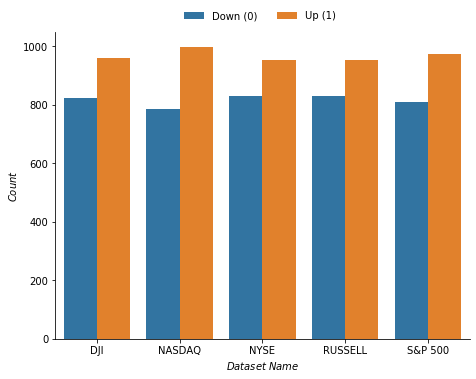

In [127]:
g = sns.catplot(x='dataset_name', hue='MOVEMENT', 
            kind='count', data=merge_df, ci=False, aspect=1.3,
               legend=False)
plt.xlabel("$Dataset$ $Name$")
plt.ylabel("$Count$")
plt.legend(labels=["Down (0)", "Up (1)"],
          bbox_to_anchor=[0.7,1.1], ncol=2, frameon=False)

plt.show()

#### Histogram plot of features

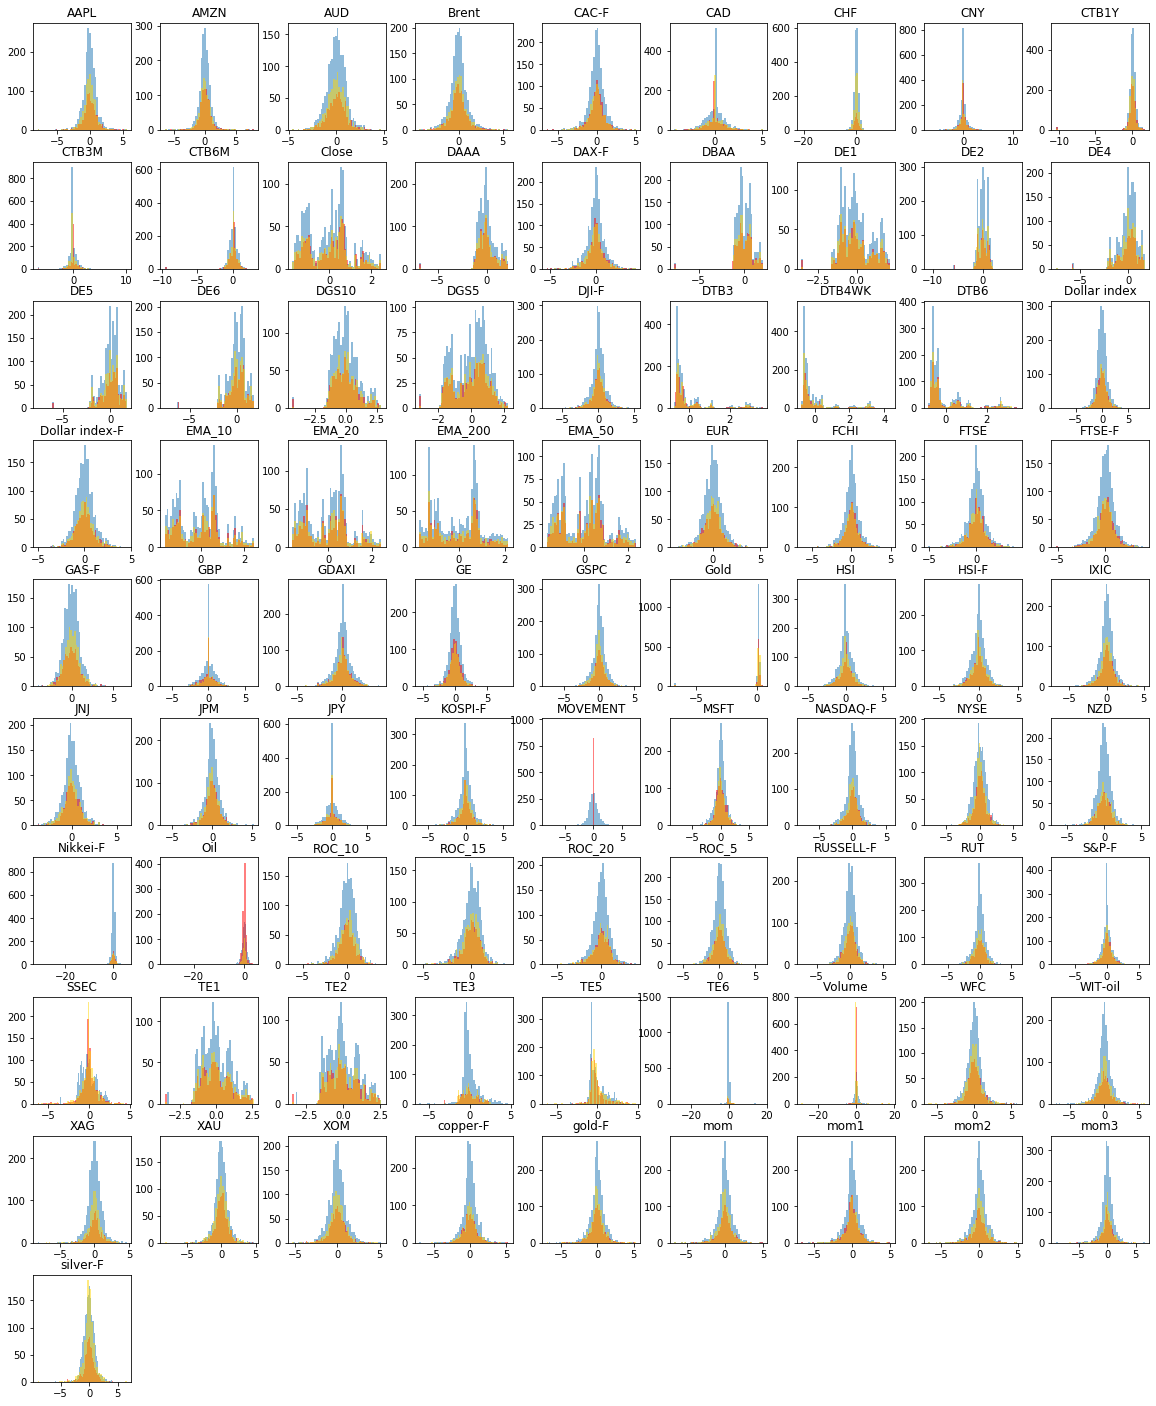

In [30]:
## DJI NASDAQ, ETC
ax = dji_df_full.drop(columns=["MOVEMENT"]).hist(bins=50, alpha=0.5, label="Full", grid=False, figsize=(20, 25))
dji_df_full[dji_df_full["MOVEMENT"] == 0].hist(bins=50, ax=ax.ravel()[:83],grid=False, color="r", alpha=0.5, label="Down")
dji_df_full[dji_df_full["MOVEMENT"] == 1].hist(bins=50, ax=ax.ravel()[:83], color="gold",grid=False, alpha=0.5, label="Up")
plt.show()

#### Feature selection with respect to label

In [51]:
fs = SelectKBest(score_func=f_classif)
X_selected = fs.fit_transform(dji_df_full.drop(columns=["MOVEMENT"]), dji_df_full["MOVEMENT"])

In [52]:
y = fs.scores_
x = dji_df_full.drop(columns=["MOVEMENT"]).columns

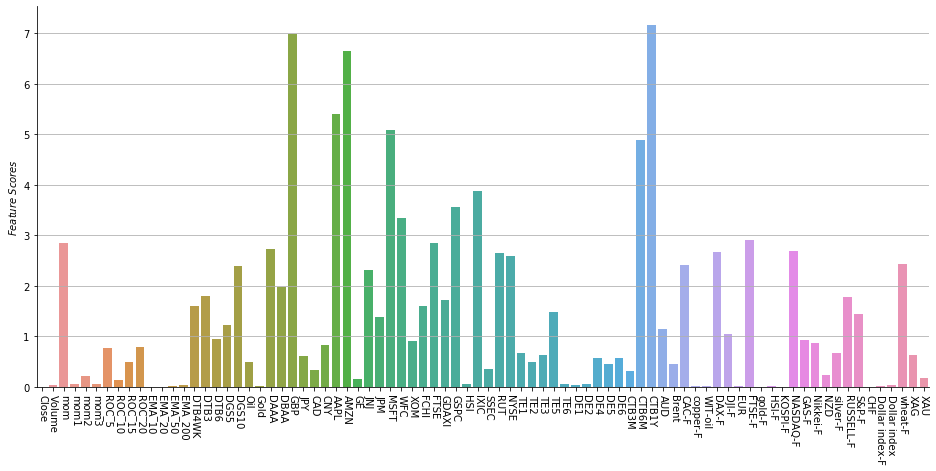

In [57]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
sns.barplot(x=x, y=y, ax=ax)
plt.xticks(rotation=-90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("$Feature$ $Scores$")
plt.grid(axis="y")
plt.show()

In [58]:
## NASDAQ
fs = SelectKBest(score_func=f_classif)
X_selected = fs.fit_transform(nasdaq_df_full.drop(columns=["MOVEMENT"]), nasdaq_df_full["MOVEMENT"])

In [59]:
y = fs.scores_
x = nasdaq_df_full.drop(columns=["MOVEMENT"]).columns

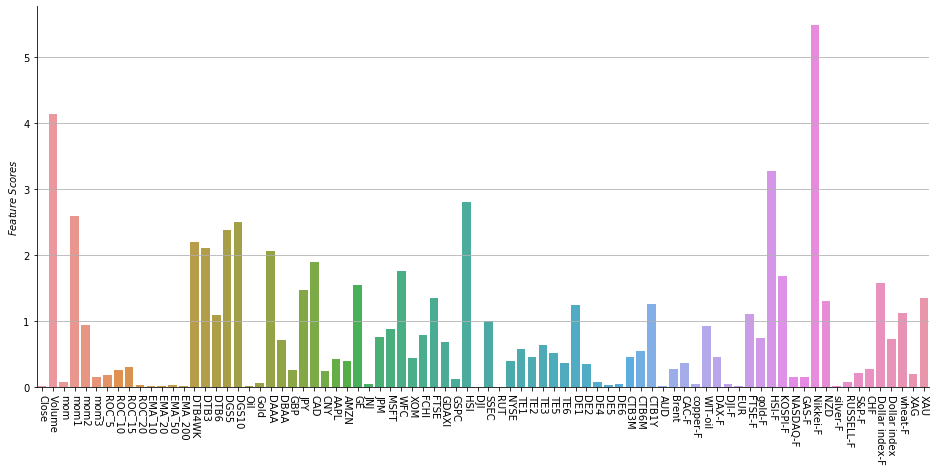

In [60]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
sns.barplot(x=x, y=y, ax=ax)
plt.xticks(rotation=-90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("$Feature$ $Scores$")
plt.grid(axis="y")
plt.show()

In [61]:
## NYSE
fs = SelectKBest(score_func=f_classif)
X_selected = fs.fit_transform(nyse_df_full.drop(columns=["MOVEMENT"]), nyse_df_full["MOVEMENT"])

In [62]:
y = fs.scores_
x = nyse_df_full.drop(columns=["MOVEMENT"]).columns

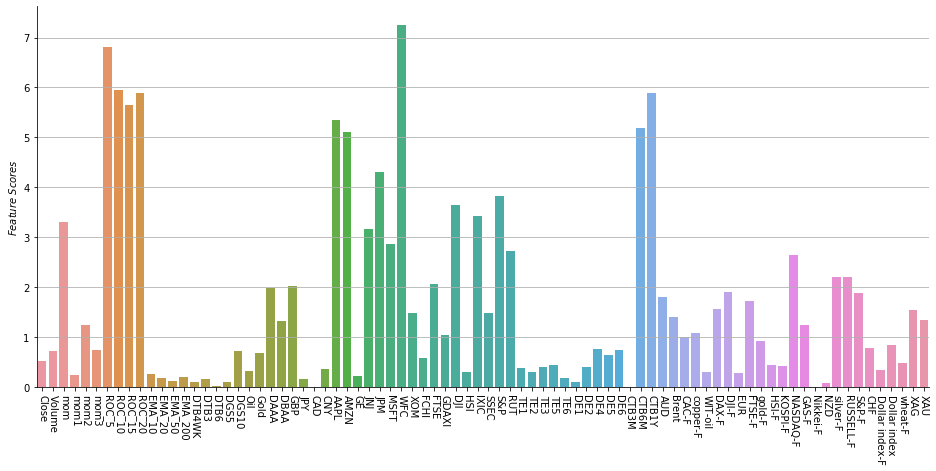

In [63]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
sns.barplot(x=x, y=y, ax=ax)
plt.xticks(rotation=-90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("$Feature$ $Scores$")
plt.grid(axis="y")
plt.show()

In [64]:
## RUSSELL
fs = SelectKBest(score_func=f_classif)
X_selected = fs.fit_transform(russell_df_full.drop(columns=["MOVEMENT"]), russell_df_full["MOVEMENT"])

In [65]:
y = fs.scores_
x = russell_df_full.drop(columns=["MOVEMENT"]).columns

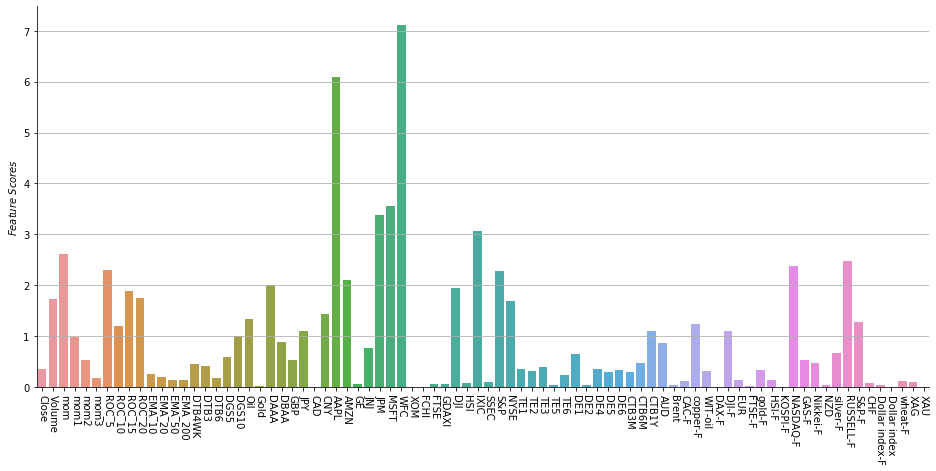

In [66]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
sns.barplot(x=x, y=y, ax=ax)
plt.xticks(rotation=-90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("$Feature$ $Scores$")
plt.grid(axis="y")
plt.show()

In [67]:
## S&P 500
fs = SelectKBest(score_func=f_classif)
X_selected = fs.fit_transform(sp_df_full.drop(columns=["MOVEMENT"]), sp_df_full["MOVEMENT"])

In [68]:
y = fs.scores_
x = sp_df_full.drop(columns=["MOVEMENT"]).columns

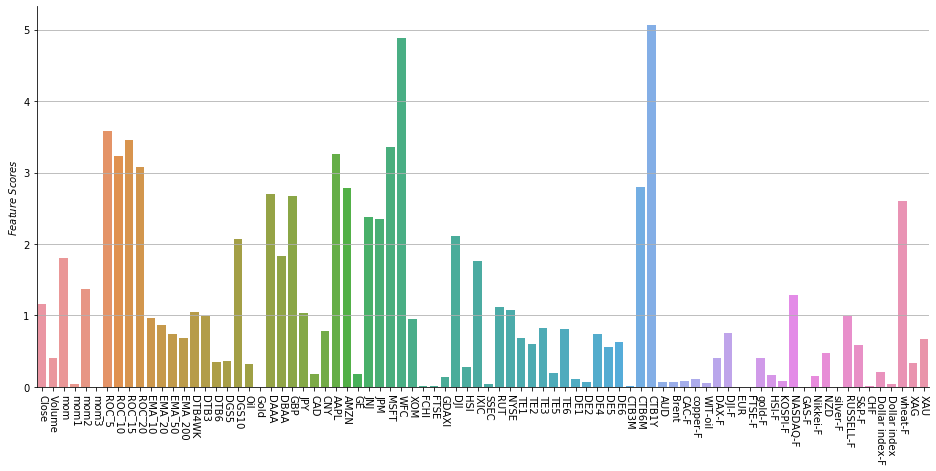

In [69]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(111)
sns.barplot(x=x, y=y, ax=ax)
plt.xticks(rotation=-90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("$Feature$ $Scores$")
plt.grid(axis="y")
plt.show()

## Time series data exploration
In this section, we explore various time series analysis on the key variables.

#### Close price vs year

In [72]:
## DJI
dji_df_time = dji_df.copy()
dji_df_time.fillna(0, inplace=True)

In [73]:
df1 = dji_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = dji_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = dji_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = dji_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = dji_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = dji_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

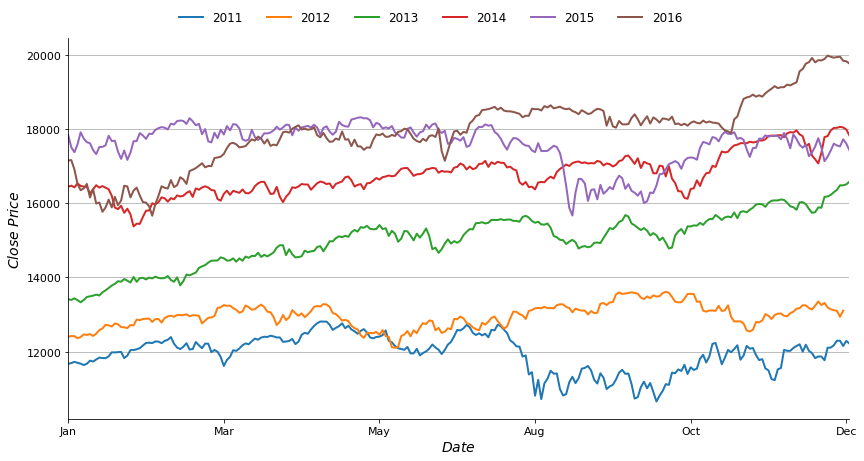

In [74]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(axis="y")
plt.show()

In [161]:
## NASDAQ
dji_df_time = nasdaq_df.copy()
dji_df_time.fillna(0, inplace=True)

In [162]:
df1 = dji_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = dji_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = dji_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = dji_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = dji_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = dji_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

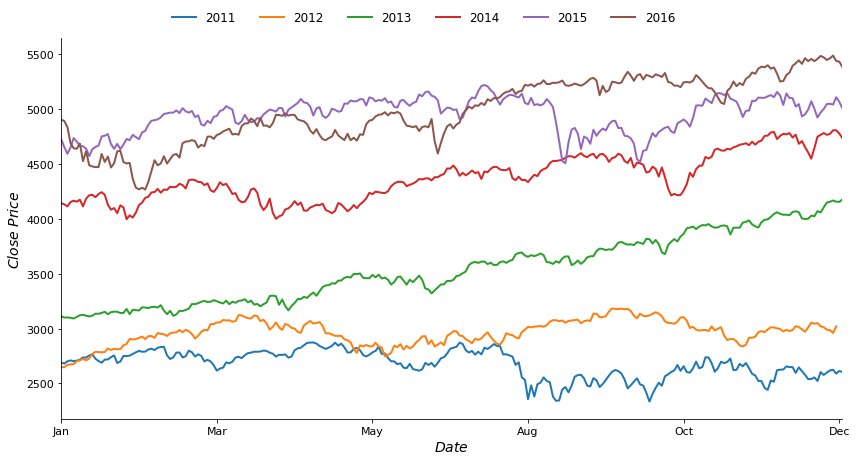

In [163]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [165]:
## NYSE
dji_df_time = nyse_df.copy()
dji_df_time.fillna(0, inplace=True)

In [166]:
df1 = dji_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = dji_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = dji_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = dji_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = dji_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = dji_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

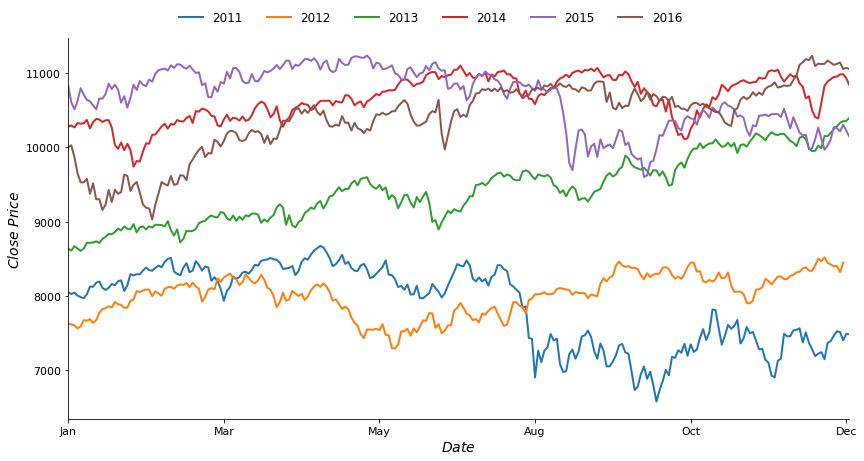

In [167]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [168]:
##russell
dji_df_time = russell_df.copy()
dji_df_time.fillna(0, inplace=True)

In [169]:
df1 = dji_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = dji_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = dji_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = dji_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = dji_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = dji_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

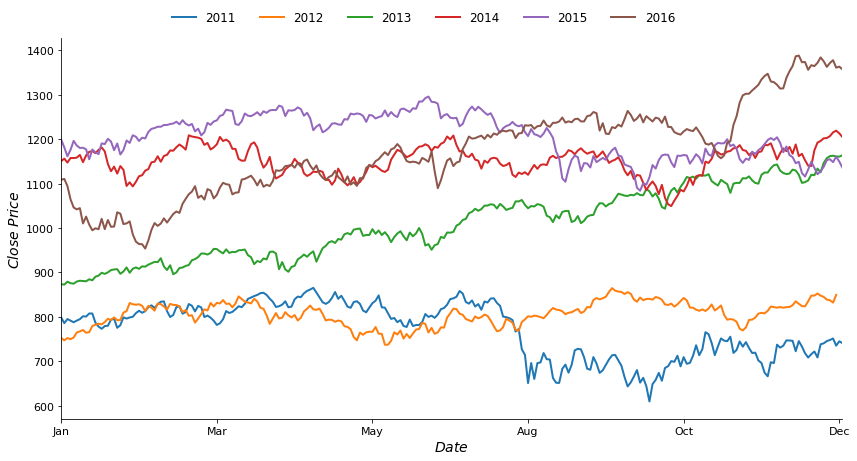

In [170]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [171]:
## s&p 500
dji_df_time = sp_df.copy()
dji_df_time.fillna(0, inplace=True)

In [172]:
df1 = dji_df_time.loc["2011":"2012"]["Close"].copy().reset_index()["Close"]
df2 = dji_df_time.loc["2012":"2013"]["Close"].copy().reset_index()["Close"]
df3 = dji_df_time.loc["2013":"2014"]["Close"].copy().reset_index()["Close"]
df4 = dji_df_time.loc["2014":"2015"]["Close"].copy().reset_index()["Close"]
df5 = dji_df_time.loc["2015":"2016"]["Close"].copy().reset_index()["Close"]
df6 = dji_df_time.loc["2016":"2017"]["Close"].copy().reset_index()["Close"]

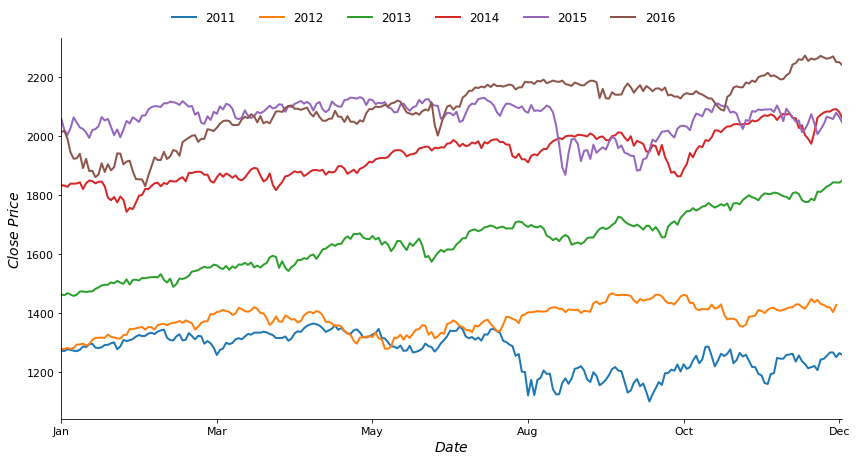

In [173]:
plt.figure(figsize=(14, 7))
ax = df1.plot(lw=2)
df2.plot(ax=ax, lw=2)
df3.plot(ax=ax, lw=2)
df4.plot(ax=ax, lw=2)
df5.plot(ax=ax, lw=2)
df6.plot(ax=ax, lw=2)
plt.xticks(np.arange(0, 252, 50), labels=["Jan", "Mar", "May", "Aug", "Oct", "Dec"])
ax.legend(["2011", "2012", "2013", "2014", "2015", "2016"],
         bbox_to_anchor=[0.8,1.1], ncol=6, frameon=False, prop={"size":12})
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlabel("$Date$", fontsize=14)
ax.set_ylabel("$Close$ $Price$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

#### Autocorrelation plot

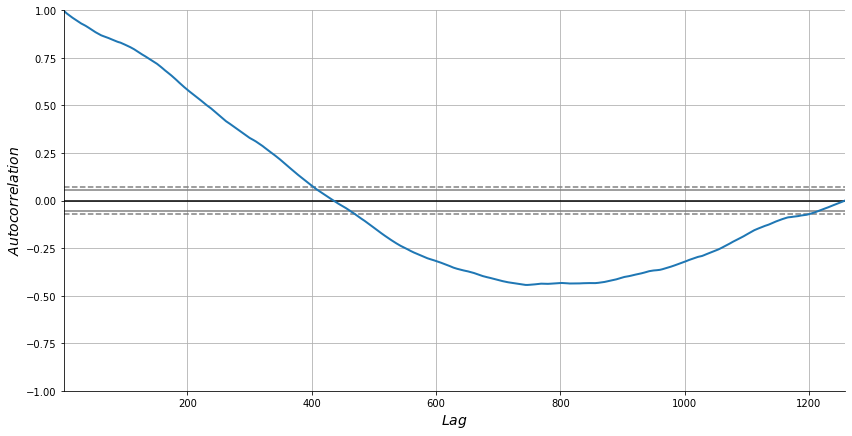

In [185]:
## DJI, NASDAQ, ETC
fig = plt.figure(figsize=(14, 7))
dji_df_time = dji_df.copy()
dji_df_time.fillna(0, inplace=True)
ax = pd.plotting.autocorrelation_plot(dji_df_time["2011":"2016"]["Close"], lw=2)
ax.set_xlabel("$Lag$", fontsize=14)
ax.set_ylabel("$Autocorrelation$", fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()